<a href="https://colab.research.google.com/github/hp241t/Automobile_Data_Analysis/blob/master/Medical_Compliance_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Training Data.csv to Training Data (4).csv


In [0]:
import pandas as pd

In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Training Data.csv']))

In [6]:
df.head(15)

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No
5,6,20,F,73,0,0,0,0,0,0,No
6,7,51,F,102,1,0,1,0,0,1,No
7,8,58,F,96,0,0,1,0,0,1,No
8,9,73,M,89,0,0,1,0,0,0,No
9,10,48,F,97,0,0,0,0,0,1,No


In [7]:
df.describe()

,patient_id,Age,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,90106.500000,37.795363,54.668485,0.078524,0.025043,0.216512,0.052566,0.000338,0.573968
std,52022.867693,22.852072,35.752491,0.268995,0.156255,0.411868,0.223166,0.018395,0.499824
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45053.750000,19.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90106.500000,38.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,135159.250000,56.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,180212.000000,113.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender                 180212 non-null object
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null object
dtypes: int64(9), object(2)
memory usage: 15.1+ MB


In [9]:
# Checking for null values

df.isnull().values.any()

False

### Binning

In [0]:
#df['Age'] = df["Age"].astype(int, copy=True)

### Dummy Variable

In [10]:
df.columns

Index(['patient_id', 'Age', 'Gender', 'Prescription_period', 'Diabetes',
       'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder',
       'Adherence'],
      dtype='object')

In [11]:
df_train_onehot = df.copy()
df_train_onehot = pd.get_dummies(df_train_onehot, columns=['Gender'], prefix = ['Gender'])

print(df_train_onehot.head())

   patient_id  Age  Prescription_period  ...  Adherence  Gender_F  Gender_M
0           1   19                    7  ...         No         0         1
1           2   24                   59  ...         No         1         0
2           3    4                   43  ...         No         1         0
3           4   38                   66  ...         No         0         1
4           5   46                   98  ...         No         1         0

[5 rows x 12 columns]


In [12]:
df_train_onehot.columns

Index(['patient_id', 'Age', 'Prescription_period', 'Diabetes', 'Alcoholism',
       'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder', 'Adherence',
       'Gender_F', 'Gender_M'],
      dtype='object')

In [0]:
df_t = df.copy()
df_t.replace(to_replace="Yes", value = 1)
df_t.replace(to_replace=['No','Yes'], value = [0,1])

replace_map = {'Adherence': {'Yes': 1, 'No': 0}}


In [14]:
df_t.dtypes

patient_id              int64
Age                     int64
Gender                 object
Prescription_period     int64
Diabetes                int64
Alcoholism              int64
HyperTension            int64
Smokes                  int64
Tuberculosis            int64
Sms_Reminder            int64
Adherence              object
dtype: object

In [15]:
df_t1 = df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_t1['Adherence'] = lb_make.fit_transform(df['Adherence'])
df_t1['Gender'] = lb_make.fit_transform(df['Gender'])

df_t1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,1,7,0,0,0,0,0,0,0
1,2,24,0,59,0,0,0,0,0,0,0
2,3,4,0,43,0,0,0,0,0,0,0
3,4,38,1,66,0,0,0,0,0,1,0
4,5,46,0,98,0,0,0,0,0,1,0


In [16]:
df_t1.dtypes

patient_id             int64
Age                    int64
Gender                 int64
Prescription_period    int64
Diabetes               int64
Alcoholism             int64
HyperTension           int64
Smokes                 int64
Tuberculosis           int64
Sms_Reminder           int64
Adherence              int64
dtype: object

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [0]:
# Checking corelation


#y = df_t1["Adherence"]
#x = df_t1["Age"]



#plt.title("Scatterplot of Adherence vs Age")
#plt.xlabel("Age")
#plt.ylabel("Adherence")
#plt.plot(x,y)
#plt.show()

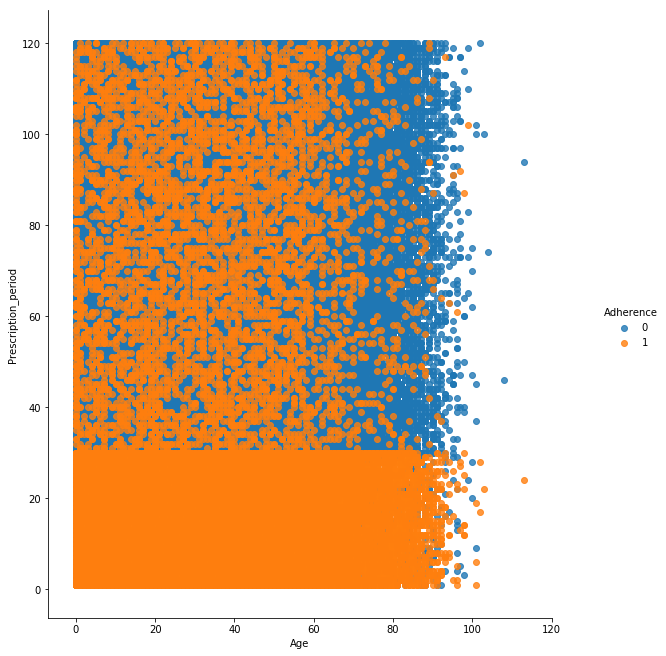

In [18]:
import seaborn as sns
sns.lmplot('Age', 'Prescription_period', df_t1, hue='Adherence', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

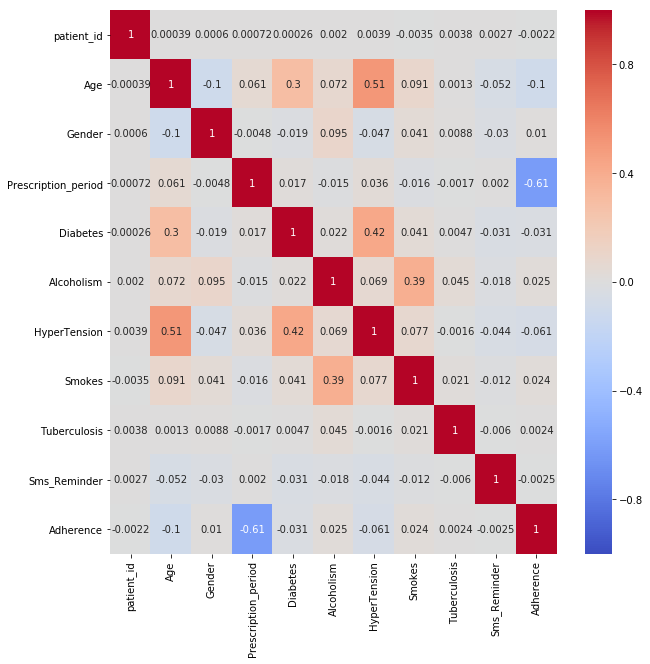

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_t1.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

####From above heatmap, we can see that Prescription_period and Age are the most correlated features. Also Diabetes and hypertension have correlation

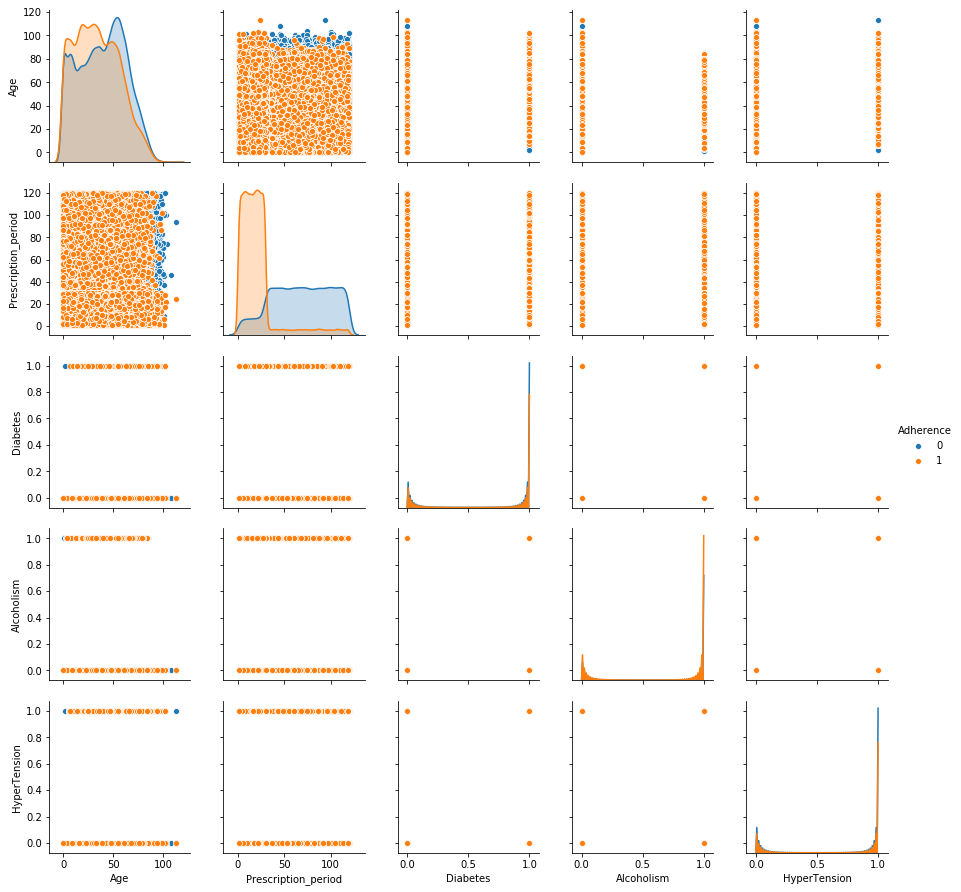

In [20]:
sns.pairplot(df_t1, hue='Adherence', vars = ['Age', 'Prescription_period', 'Diabetes', 'Alcoholism',
       'HyperTension' ])

In [22]:
df_t1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,1,7,0,0,0,0,0,0,0
1,2,24,0,59,0,0,0,0,0,0,0
2,3,4,0,43,0,0,0,0,0,0,0
3,4,38,1,66,0,0,0,0,0,1,0
4,5,46,0,98,0,0,0,0,0,1,0


In [0]:
df_drop = df_t1.copy()
df_final = df_drop.drop(['patient_id','Smokes', 'Tuberculosis', 'Sms_Reminder','Gender'], axis=1)


In [24]:
df_final.head()

,Age,Prescription_period,Diabetes,Alcoholism,HyperTension,Adherence
0,19,7,0,0,0,0
1,24,59,0,0,0,0
2,4,43,0,0,0,0
3,38,66,0,0,0,0
4,46,98,0,0,0,0


In [0]:
X = pd.DataFrame(df_final.iloc[:,:-1])
y = pd.DataFrame(df_final.iloc[:,-1])

In [0]:
df_fin = df_drop.drop(['patient_id'], axis=1)

X_all = pd.DataFrame(df_fin.iloc[:,:-1])
y_all = pd.DataFrame(df_fin.iloc[:,-1])

In [28]:
X.head()

,Age,Prescription_period,Diabetes,Alcoholism,HyperTension
0,19,7,0,0,0
1,24,59,0,0,0
2,4,43,0,0,0
3,38,66,0,0,0
4,46,98,0,0,0


In [29]:
y.head()

,Adherence
0,0
1,0
2,0
3,0
4,0


#### Split the data into train and test sets using scikit learn train_test_split module

In [0]:
# Import module to split dataset

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all , test_size =0.2, random_state=1)

#### Train the algorithm using scikit learn linear model

In [31]:

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logmodel.predict(X_val)

#### Calculate accuracy

In [33]:
print('Accuracy: %d', (logmodel.score(X_val, y_val)))

Accuracy: %d 0.8813639264212191


#### Evaluate the model using confusion matrix from scikit learn confusion matrix module

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[22916  2398]
 [ 1878  8851]]


## Model 2 : SVM


In [0]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
y_pred_svc = svc_model.predict(X_val)